## 👘🪭 utworzenie API dla naszej apki 🧑🏽‍💻🌊


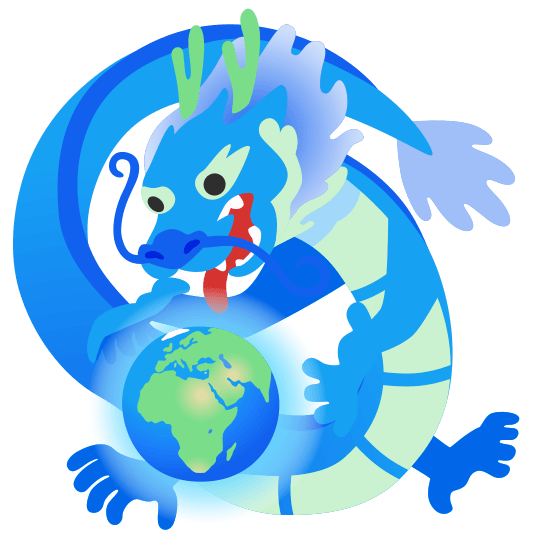

Czym jest API i jak działa?

API (ang. Application Programming Interface) to interfejs, który umożliwia różnym aplikacjom komunikowanie się ze sobą. W kontekście aplikacji MERN (MongoDB, Express.js, React, Node.js), API to "most" między frontendem (częścią, z którą użytkownik ma bezpośredni kontakt) a backendem (serwerem, gdzie przechowywane są dane i logika aplikacji).

Podstawowe kroki API w aplikacji MERN:
Użytkownik wysyła żądanie (np. klikając przycisk).
Frontend (React) wysyła żądanie HTTP (GET, POST, PUT, DELETE) do API backendu.
Backend (Node + Express) przyjmuje żądanie i, jeśli to konieczne, komunikuje się z MongoDB.
MongoDB przetwarza zapytanie (odczyt, zapis, aktualizacja, usunięcie).
Backend wysyła odpowiedź do frontendu, który wyświetla wynik użytkownikowi.
API w aplikacji MERN pomaga więc w wymianie informacji między frontendem a backendem, umożliwiając użytkownikom dostęp do danych i funkcji aplikacji w wygodny sposób.

![Opis obrazka](../pictures/API.jpg)



Oto jak działa API w aplikacji MERN:

Frontend (React): Frontend to część aplikacji, którą widzi użytkownik. Kiedy użytkownik wykonuje jakąś akcję (np. wypełnia formularz i klika przycisk), React (frontend) wysyła żądanie do backendu. Żądanie to jest wysyłane przez API do serwera i zazwyczaj zawiera dane, takie jak informacje z formularza.

Backend (Node.js i Express.js):

Node.js to platforma do uruchamiania JavaScriptu na serwerze.
Express.js to framework, który ułatwia tworzenie serwera HTTP i obsługę różnych żądań.
Gdy frontend wyśle żądanie przez API, backend (Node.js z Express) przyjmuje je i wykonuje odpowiednie operacje, np. zapisanie danych do bazy danych lub ich odczyt.

Baza danych (MongoDB): Backend, otrzymawszy żądanie, może sięgnąć do bazy danych MongoDB, by pobrać potrzebne dane lub zapisać nowe. MongoDB to baza danych NoSQL, gdzie dane przechowywane są w formie dokumentów, co jest wygodne dla aplikacji, które często pracują z dużymi zestawami danych.

Odpowiedź do frontendu: Po wykonaniu żądanej operacji backend wysyła odpowiedź z powrotem do frontendu. Na przykład, jeśli użytkownik wyszukał produkt, backend może pobrać dane o produkcie z MongoDB i wysłać je do frontendu, gdzie zostaną wyświetlone użytkownikowi.

Teraz przejdziemy do edycji pliku product.model.js

In [ ]:
import mongoose from "mongoose";

const productSchema = new mongoose.Schema(
  {
    name: {
      type: String,
      required: true,
    },
    price: {
      type: Number,
      required: true,
    },
    image: {
      type: String,
      required: true,
    },
  },
  {
    timestamps: true, //createdAt, updatedAt
  }
);

const Product = mongoose.model("Product", productSchema);

// in the database it will be called products
export default Product;


Edytujemy plik server.js

In [ ]:
// backend/server.js

import express from "express";
import dotenv from "dotenv";
import { connectDB } from "./config/db.js";
import Product from "./models/product.model.js";

dotenv.config();

const app = express();

app.post("/products", async (req, res) => {
  const product = req.body; // user will send this data

  if (product.name || !product.price || !product.image) {
    return res
      .status(400)
      .json({ success: false, message: "Please provide all fields" });
  }

  const newProduct = new Product(product);

  try {
    await newProduct.save();
    res.status(201).json({ success: true, data: newProduct });
  } catch (error) {
    console.error("Error in Create product:", error.message);
    res.status(500).json({ success: false, message: "Server Error" });
  }
});

console.log(process.env.MONGO_URI);

app.listen(5000, () => {
  connectDB();
  console.log("Server started at http://localhost:5000");
});


Do testowania metody POST musimy ściągnąć aplikację Postman. 

# Tworzenie nowego produktu w aplikacji za pomocą Postmana
Poniżej znajdziesz kroki, które pomogą Ci wysłać żądanie POST do serwera, aby dodać nowy produkt do naszej bazy danych:

![postman icon](../pictures/postman_icon.jpg)   



W postmanie wchodzimy w sekcję Workspaces i wybieramy Create Workspace. Jedyne co musimy dalej zrobić to nadać jej nazwę, u mnie jest to mern_app, po czym klikamy create. 

Teraz możemy zacząć tworzyć kolekcje. Powiedzmy że dla każdego produktu utworzymy daną kolekcję. Klikamy w Collections i dodajemy nową o nazwie products. Najeżdżamy na kolekcję products i klikamy w 3 kropki (menu). Powinno nam się wyświetlić add request, jak na obrazku poniżej.

![instrukcja #1](../pictures/postman1.jpg)


Wybierz metodę HTTP POST
Wybieramy metodę POST, ponieważ chcemy utworzyć nowy zasób (w tym przypadku produkt) na serwerze.

Wprowadź URL endpointu
W polu URL wpisujemy adres naszego endpointu API, który obsługuje tworzenie produktów. W tym przykładzie będzie to:

In [ ]:
http://localhost:5000/api/products

Przejdź do sekcji Body i wybierz format danych
W sekcji Body wybieramy opcję raw, a następnie jako format danych JSON. Dzięki temu możemy wysłać dane w formacie JSON, który serwer potrafi zrozumieć.

Wprowadź dane nowego produktu
W polu JSON poniżej wpisujemy szczegóły nowego produktu, który chcemy utworzyć, np.:

In [ ]:
{
    "name": "chleb pszenny",
    "price": 4.99,
    "image": "https://example.com/image.jpg"
}

Każdy produkt powinien zawierać takie pola jak: name (nazwa produktu), price (cena produktu), i image (URL obrazu produktu).

Upewnij się, że odpowiedź zostanie zwrócona w formacie JSON

Aby upewnić się, że odpowiedź z serwera będzie sformatowana jako JSON, Postman automatycznie dopasuje odpowiedź na podstawie tego, co wybraliśmy w Body, więc nie musisz dodatkowo zmieniać ustawień.

Kliknij SEND i sprawdź odpowiedź

Na koniec kliknij przycisk SEND. Po wysłaniu żądania zobaczysz odpowiedź serwera w sekcji Response poniżej. Jeśli wszystko jest poprawnie skonfigurowane, powinna pojawić się odpowiedź z danymi nowo utworzonego produktu.

![postman](../pictures/postman2.jpg)


Teraz jeżeli chcemy sprawdzić, czy produkt dodał się poprawnie do naszej bazy danych, wchodzimy jeszcze raz na stronę https://www.mongodb.com/

Wchodzimy w nasz Klaster, wybieramy Browse Collections. Powinniśmy zobaczyć nasz przed chwilką utworzony produkt. Yeaaaahhh

![mongotest](../pictures/mongoTest.jpg)

Po sprawdzeniu czy produkt został poprawnie utworzony w naszej bazie danych przechodzimy do dodania kolejnych metod. Edytujemy plik server.js, dodamy do niego metodę usuwania produktu

In [ ]:
// backend/server.js

import express from "express";
import dotenv from "dotenv";
import { connectDB } from "./config/db.js";
import Product from "./models/product.model.js";

dotenv.config();

const app = express();

app.use(express.json()); // allows us to accept JSON data in the req.body

// Define the POST route for creating a product
app.post("/api/products", async (req, res) => {
  const product = req.body;

  // Validate request body
  if (!product.name || !product.price || !product.image) {
    return res
      .status(400)
      .json({ success: false, message: "Please provide all fields" });
  }

  const newProduct = new Product(product);

  try {
    await newProduct.save();
    res.status(201).json({ success: true, data: newProduct });
  } catch (error) {
    console.error("Error in Create product:", error.message);
    res.status(500).json({ success: false, message: "Server Error" });
  }
});

app.delete("/api/products/:id", async (req, res) => {
  const { id } = req.params;
  console.log("id:", id);
});

console.log(process.env.MONGO_URI);

app.listen(5000, () => {
  connectDB();
  console.log("Server started at http://localhost:5000");
});


Teraz wchodzimy do Postmana i dodajemy nowy request, który posłuży nam do usuwania produktu o konkretnym ID z naszej bazy danych.

![metodadelete](../pictures/postman_delete.jpg)

Aby podejrzeć ID naszych produktów w bazie wchodzimy na stronę mongodb i szukamy produktu, który chcemy usunąć

![MongoDB szukamy id produkty](../pictures/mongodbCOPY.jpg)

Teraz zmienimy kod w server.js tak, aby obsługiwał przypadki, kiedy wpiszemy id, które nie istnieje w naszej bazie 

In [ ]:
import express from "express";
import dotenv from "dotenv";
import { connectDB } from "./config/db.js";
import Product from "./models/product.model.js";

dotenv.config();

const app = express();

app.use(express.json()); // middleware which allows us to accept JSON data in the req.body

app.post("/api/products", async (req, res) => {
  const product = req.body;

  if (!product.name || !product.price || !product.image) {
    return res
      .status(400)
      .json({ success: false, message: "Please provide all fields" });
  }

  const newProduct = new Product(product);

  try {
    await newProduct.save();
    res.status(201).json({ success: true, data: newProduct });
  } catch (error) {
    console.error("Error in Create product:", error.message);
    res.status(500).json({ success: false, message: "Server Error" });
  }
});

app.delete("/api/products/:id", async (req, res) => {
  const { id } = req.params;

  try {
    await Product.findByIdAndDelete(id);
    res.status(200).json({ success: true, message: "Product deleted" });
  } catch (error) {
    res.status(404).json({ success: false, message: "Product not found" });
  }

  console.log("id:", id);
});

console.log(process.env.MONGO_URI);

app.listen(5000, () => {
  connectDB();
  console.log("Server started at http://localhost:5000");
});


Abyśmy sprawdzili, czy to działa, wpisujemy do Postmana request o usunięcie produktu z id, którego nie mamy w bazie, np. 123

![wpisanie id którego nie mamy w bazie](../pictures/postman3.jpg)

Dostaliśmy wiadomość zwrotną, że produktu nie odnaleziono, więc wszystko działa zgodnie z oczekiwaniami. 

Wprowadziłam parę zmian w kodzie aplikacji (w folderze backend), które teraz omówimy. Są to ostatnie zmiany, po których możemy zacząć testować wszystkie endpointy w naszej aplikacji, a następnie będziemy mogli zacząć budowanie frontendu.